MUHAMMAD HAIDAR IZZUDDIN - DATA ANALYST

## PREPROCESSING

### 1. Import Library Dasar yang Dibutuhkan

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re

### 2. Load Dataset ke Dataframe

In [120]:
data = pd.read_csv('GA_180123.csv')
data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\2305206635.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('GA_180123.csv')


,Page Title,Page,articleid,contenttype,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users
0,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,google / organic,99099,127793,1.546663,113.012962,93.089694,18666
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",m.detik.com/health/read/2018/01/18/124423/3821...,3821182,singlepagenews,banner / apps,66409,110322,1.651700,14.790801,2.804197,59502
2,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,(direct) / (none),64686,79376,1.394323,90.728763,43.394609,25789
3,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,googleapis.com / referral,49821,65072,1.386458,137.591554,23.242243,12374
4,Gempa Keras Guncang Jakarta,news.detik.com/berita/d-3829115/gempa-keras-gu...,3829115,singlepagenews,google / organic,39147,46828,1.370963,145.927336,205.678242,9375
...,...,...,...,...,...,...,...,...,...,...,...
689700,アダルト時代にはまだ濡れていますか？たぶんこの原因,translate.googleusercontent.com/translate_c?ac...,2764710,singlepagenews,(direct) / (none),1,1,1.000000,651.000000,519.000000,0
689701,ここでストーリースウィートベイビーカリスタは、スカンクに目指すことができる,translate.googleusercontent.com/translate_c?de...,3139266,singlepagenews,(direct) / (none),1,1,0.000000,0.000000,0.000000,0
689702,すでに大人がまだ濡れていますか？これが原因です,translate.googleusercontent.com/translate_c?de...,1722916,singlepagenews,(direct) / (none),1,1,1.000000,0.000000,0.000000,0
689703,美麗的姿勢與月神瑪雅食物失敗蛋糕總失敗,translate.googleusercontent.com/translate_c?de...,3828445,multiplepagenews,(direct) / (none),1,1,0.000000,0.000000,1310.000000,0


### 3. Menggali Informasi dalam Dataframe

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689705 entries, 0 to 689704
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Page Title             689705 non-null  object 
 1   Page                   689705 non-null  object 
 2   articleid              689705 non-null  object 
 3   contenttype            689705 non-null  object 
 4   Source / Medium        689705 non-null  object 
 5   Users                  689705 non-null  int64  
 6   Pageviews              689705 non-null  int64  
 7   Pages / Session        689705 non-null  float64
 8   Avg. Session Duration  689705 non-null  float64
 9   Avg. Time on Page      689705 non-null  float64
 10  New Users              689705 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 57.9+ MB


In [122]:
data.nunique()

Page Title               152219
Page                     284596
articleid                173155
contenttype                  29
Source / Medium            1849
Users                      2324
Pageviews                  2477
Pages / Session            9896
Avg. Session Duration     31295
Avg. Time on Page         50365
New Users                   405
dtype: int64

Didapatkan informasi bahwa hanya ada 173,155 artikel unik pada data tersebut, padahal jumlah data berkisar 689,705

### 4. Handling Duplicated Data

In [123]:
data = data.drop_duplicates(subset='articleid', keep='first').reset_index(drop=True)
data

,Page Title,Page,articleid,contenttype,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users
0,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,google / organic,99099,127793,1.546663,113.012962,93.089694,18666
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",m.detik.com/health/read/2018/01/18/124423/3821...,3821182,singlepagenews,banner / apps,66409,110322,1.651700,14.790801,2.804197,59502
2,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",m.detik.com/news/berita/d-3826824/antar-tuyul-...,3826824,singlepagenews,facebook / cpc,34774,37954,1.103282,47.572309,4.260872,12404
3,"Beredar Kabar Ada Gempa Susulan 7,4 SR Nanti M...",m.detik.com/news/berita/d-3829827/beredar-kaba...,3829827,singlepagenews,google / organic,29656,36411,1.411662,83.666460,22.214847,6533
4,"Guncangan Terasa Kencang di Jakarta, Pusat Gem...",m.detik.com/news/berita/d-3829131/guncangan-te...,3829131,singlepagenews,google / organic,27159,32868,1.798621,106.218836,60.017182,5363
...,...,...,...,...,...,...,...,...,...,...,...
173150,"Zulkiram Pilih Dipecat karena Masuknya Nyogok,...",m.detik.com/news/berita/3589564/zulkiram-resig...,3589564,singlepagenews,(direct) / (none),1,1,1.000000,0.000000,0.000000,1
173151,"Zumba Dance, Kombinasi Tarian & Fitness yang B...",m.detik.com/wolipop/read/2013/03/15/073249/219...,2194632,singlepagenews,(direct) / (none),1,1,1.000000,0.000000,0.000000,0
173152,Zumi Zola Pernah Sebarkan Foto Telanjangnya Se...,m.detik.com/hot/celeb/1837303/zumi-zola-pernah...,1837303,singlepagenews,google / organic,1,1,1.000000,37.000000,28.000000,1
173153,Zuppa Soup Gurih dengan Topping Renyah Bisa Di...,m.detik.com/food/info-kuliner/d-2472739/zuppa-...,2472739,multiplepagenews,google / organic,1,1,1.000000,0.000000,0.000000,0


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173155 entries, 0 to 173154
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Page Title             173155 non-null  object 
 1   Page                   173155 non-null  object 
 2   articleid              173155 non-null  object 
 3   contenttype            173155 non-null  object 
 4   Source / Medium        173155 non-null  object 
 5   Users                  173155 non-null  int64  
 6   Pageviews              173155 non-null  int64  
 7   Pages / Session        173155 non-null  float64
 8   Avg. Session Duration  173155 non-null  float64
 9   Avg. Time on Page      173155 non-null  float64
 10  New Users              173155 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 14.5+ MB


### 5. Deskripsi Data

In [125]:
data.describe()

,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users
count,173155.000000,173155.000000,173155.000000,173155.000000,173155.000000,173155.000000
mean,14.599526,16.734382,1.223436,103.019052,82.696531,1.766157
std,401.433249,517.666246,4.638561,568.821379,217.690921,160.586127
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,12.000000,59.000000,1.000000
max,99099.000000,127793.000000,466.500000,61888.000000,1997.000000,59502.000000


### 6. Handling Judul Non-Latin 

In [127]:
#Drop baris dengan karakter non-Latin
data = data[~data['Page Title'].str.contains('[^\x00-\x7F]', regex=True)].reset_index(drop=True)
data

,Page Title,Page,articleid,contenttype,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users
0,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,google / organic,99099,127793,1.546663,113.012962,93.089694,18666
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",m.detik.com/health/read/2018/01/18/124423/3821...,3821182,singlepagenews,banner / apps,66409,110322,1.651700,14.790801,2.804197,59502
2,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",m.detik.com/news/berita/d-3826824/antar-tuyul-...,3826824,singlepagenews,facebook / cpc,34774,37954,1.103282,47.572309,4.260872,12404
3,"Beredar Kabar Ada Gempa Susulan 7,4 SR Nanti M...",m.detik.com/news/berita/d-3829827/beredar-kaba...,3829827,singlepagenews,google / organic,29656,36411,1.411662,83.666460,22.214847,6533
4,"Guncangan Terasa Kencang di Jakarta, Pusat Gem...",m.detik.com/news/berita/d-3829131/guncangan-te...,3829131,singlepagenews,google / organic,27159,32868,1.798621,106.218836,60.017182,5363
...,...,...,...,...,...,...,...,...,...,...,...
173037,Zulkifli Muhammad Ali Siap Penuhi Panggilan Ba...,m.detik.com/news/berita/d-3819860/zulkifli-muh...,3819860,singlepagenews,facebook / oa,1,1,1.000000,258.000000,22.000000,0
173038,"Zulkiram Pilih Dipecat karena Masuknya Nyogok,...",m.detik.com/news/berita/3589564/zulkiram-resig...,3589564,singlepagenews,(direct) / (none),1,1,1.000000,0.000000,0.000000,1
173039,"Zumba Dance, Kombinasi Tarian & Fitness yang B...",m.detik.com/wolipop/read/2013/03/15/073249/219...,2194632,singlepagenews,(direct) / (none),1,1,1.000000,0.000000,0.000000,0
173040,Zumi Zola Pernah Sebarkan Foto Telanjangnya Se...,m.detik.com/hot/celeb/1837303/zumi-zola-pernah...,1837303,singlepagenews,google / organic,1,1,1.000000,37.000000,28.000000,1


### 8. Korelasi Atribut

In [179]:
from matplotlib.colors import ListedColormap

In [184]:
from matplotlib.colors import LinearSegmentedColormap

In [185]:
custom_colors = ['#1f3374', '#304ba6', '#d8e4f7', '#cb6ebe', '#f8c220', '#f05555']
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

In [186]:
numeric_data = data.select_dtypes(include=['int', 'float'])
numeric_data = numeric_data.drop(columns=['New Users'])

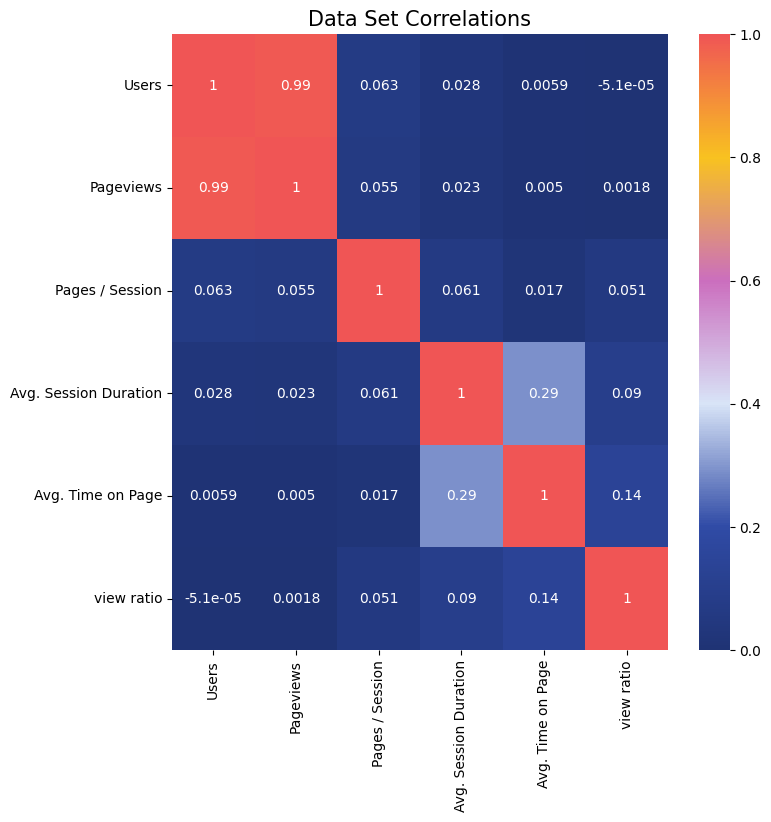

In [195]:
plt.figure(figsize=(8,8))
corr_plot = sns.heatmap(numeric_data.corr(), cmap=custom_cmap, annot=True)
plt.title('Data Set Correlations', size=15)
plt.show()

### 9. Tipe Konten Berita

In [130]:
data['contenttype'].unique()

array(['singlepagenews', 'multiplefotophoto', 'multiplepagenews', 'news',
       'longstorynews', 'video', '(not set)', 'livereport', 'videonews',
       'multiplepagephoto', 'livereportnews', 'resepnews'], dtype=object)

In [131]:
data['contenttype'].value_counts()

contenttype
singlepagenews       151009
multiplefotophoto     12055
multiplepagenews       5519
news                   3471
video                   481
longstorynews           309
videonews               144
multiplepagephoto        27
resepnews                12
livereportnews           10
livereport                3
(not set)                 2
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\1694332105.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


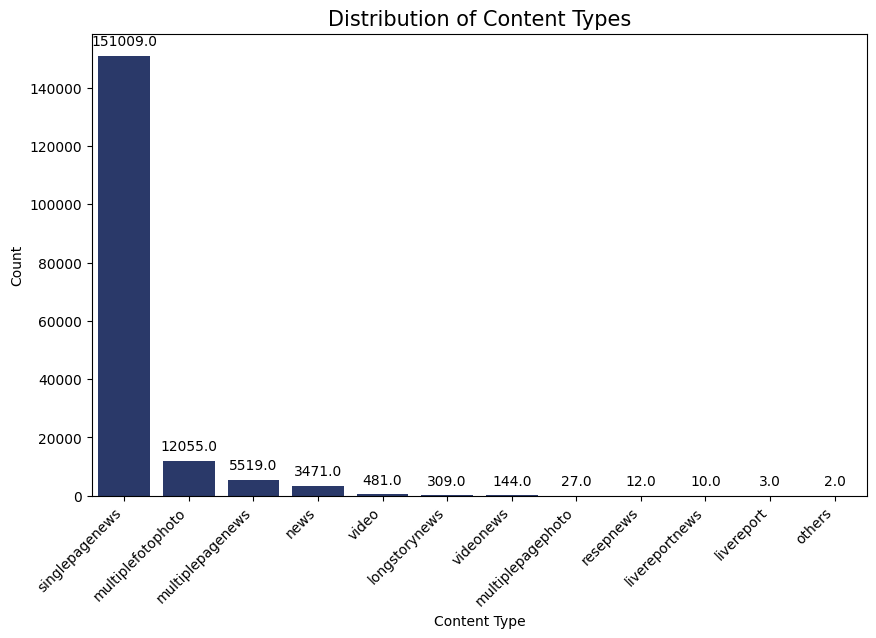

In [198]:
custom_palette = ['#1f3374', '#304ba6', '#d8e4f7', '#cb6ebe', '#f8c220', '#f05555']

# Get the order of content types by descending count
order = data['contenttype'].value_counts().index

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(custom_palette)
ax = sns.countplot(x='contenttype', data=data, order=order)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Annotate counts above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Content Types', size=15)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

In [132]:
others_values = ['(not set)', 'sr:team:2833', 'sr:team:74', 'sr:team:45', 'sr:team:2687', 'sr:team:17',
                  'sr:team:2839', 'sr:team:2829', 'sr:team:2685', 'sr:team:115067', 'sr:team:2556',
                  'sr:team:2672', 'sr:team:2816', 'sr:team:2828', 'sr:team:2836', 'sr:team:2885',
                  'sr:team:30', 'sr:team:42']

data['contenttype'].replace(to_replace=others_values, value='others', inplace=True)

In [133]:
data['contenttype'].value_counts()

contenttype
singlepagenews       151009
multiplefotophoto     12055
multiplepagenews       5519
news                   3471
video                   481
longstorynews           309
videonews               144
multiplepagephoto        27
resepnews                12
livereportnews           10
livereport                3
others                    2
Name: count, dtype: int64

In [136]:
data.groupby('contenttype')['Pageviews'].mean()

contenttype
livereport            7.000000
livereportnews        1.400000
longstorynews        14.190939
multiplefotophoto    33.835919
multiplepagenews      7.010509
multiplepagephoto     1.851852
news                  4.311726
others                5.000000
resepnews             1.333333
singlepagenews       16.076479
video                 3.320166
videonews             1.944444
Name: Pageviews, dtype: float64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\3040384314.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


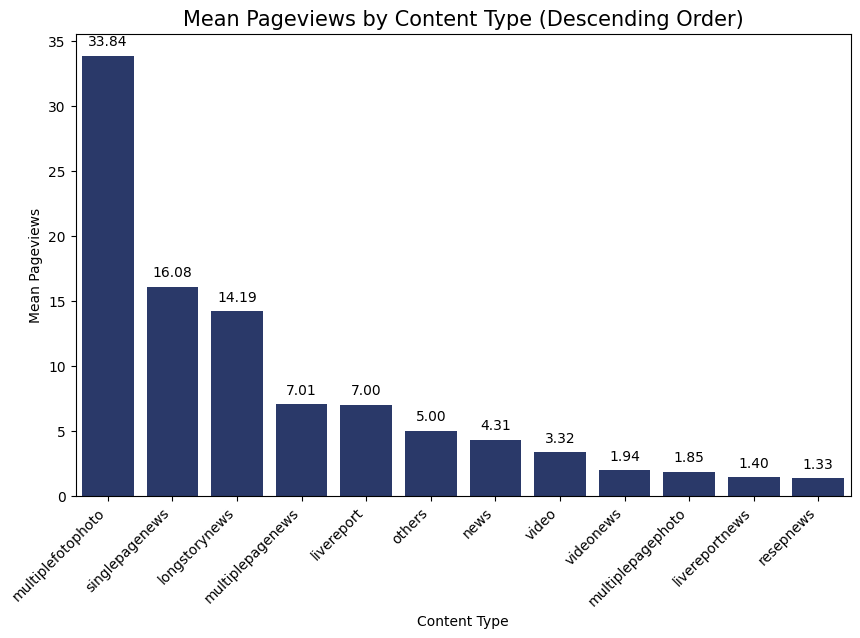

In [199]:
# Get the order of content types by descending mean pageviews
order = data.groupby('contenttype')['Pageviews'].mean().sort_values(ascending=False).index

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(custom_palette)
ax = sns.barplot(x='contenttype', y='Pageviews', data=data.groupby('contenttype')['Pageviews'].mean().reset_index(), order=order)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Annotate mean pageviews above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Mean Pageviews by Content Type (Descending Order)', size=15)
plt.xlabel('Content Type')
plt.ylabel('Mean Pageviews')
plt.show()

### 10. Source Berita

In [134]:
data['Source / Medium'].unique()

array(['google / organic', 'banner / apps', 'facebook / cpc',
       'googleapis.com / referral', 'detik.com / referral',
       '(direct) / (none)', 'facebook / oa', 'hot.detik.com / referral',
       'twitter / oa', 'm.facebook.com / referral',
       'm.detik.com / referral', 'news.detik.com / referral',
       'finance.detik.com / referral', 't.co / referral',
       'id.yahoo.com / referral', 'instagram.com / referral',
       'igstories / oa', 'flipboard.com / referral',
       'sport.detik.com / referral', 'wolipop.detik.com / referral',
       'notifikasi / mobile', 'tpc.googlesyndication.com / referral',
       'oto.detik.com / referral', 'facebook / btn',
       'food.detik.com / referral',
       'news-sg.op-mobile.opera.com / referral',
       'health.detik.com / referral', 'connect.detik.com / referral',
       'hoaxornot.detik.com / referral', 'whatsapp / btn',
       'inet.detik.com / referral', 'travel.detik.com / referral',
       'play.google.com / referral', 'dlvr.it

In [135]:
data['Source / Medium'].value_counts()

Source / Medium
google / organic                              110132
(direct) / (none)                              26875
detik.com / referral                            9227
m.detik.com / referral                          2979
googleapis.com / referral                       2895
                                               ...  
mutdworld.com / referral                           1
antavaya / browser                                 1
trendsmap.com / referral                           1
glass-haven-133223.appspot.com / referral          1
beritagar-id.cdn.ampproject.org / referral         1
Name: count, Length: 474, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\2757781050.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


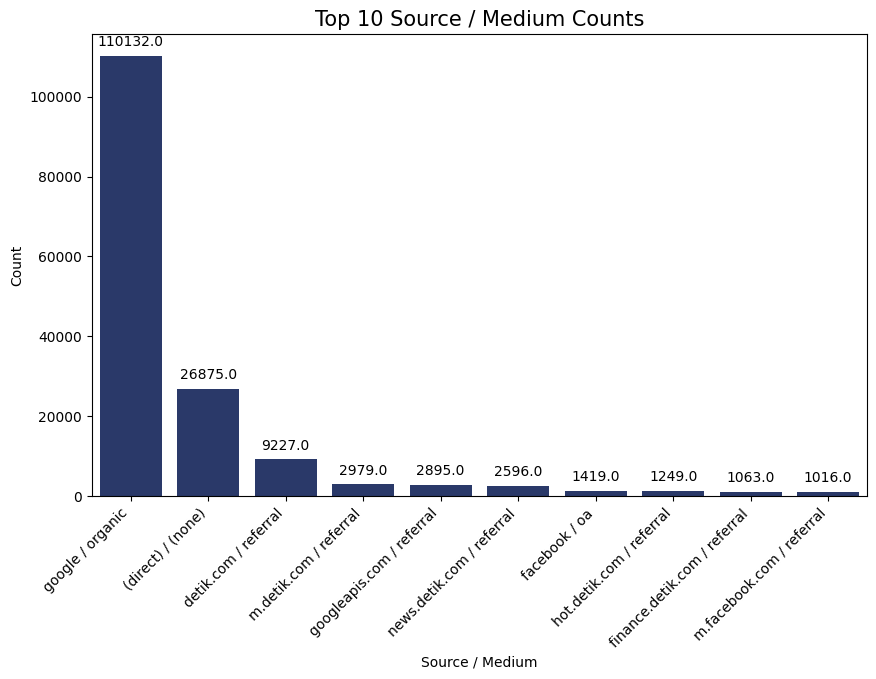

In [200]:
# Get the top 10 'Source / Medium' values by counts
top_sources = data['Source / Medium'].value_counts().nlargest(10).index

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(custom_palette)
ax = sns.countplot(x='Source / Medium', data=data[data['Source / Medium'].isin(top_sources)], order=top_sources)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Annotate counts above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Top 10 Source / Medium Counts', size=15)
plt.xlabel('Source / Medium')
plt.ylabel('Count')
plt.show()

## PERSIAPAN ANALISIS

In [28]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1. Fungsi Text Cleaning

In [35]:
def preprocess(text):
  text = str(text).lower()
  text = re.sub('\n',' ',text)
  text = re.sub('/', ' ', text)
  text = re.sub('&amp;', ' ', text)
  text = re.sub(r'[^0-9a-zA-Z.?!]', ' ', text)
  text = re.sub(' + *', ' ', text)
  text = re.sub('  ', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  return text

def remove_doublespace(text):
  text = re.sub(r'\s+', ' ', text)
  return text

In [156]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [157]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [159]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

In [158]:
idn_stopwords = stopwords.words('indonesian')

In [160]:
def remove_stopword(text):
    text = re.sub('[.,!?]',' ',text)
    text = ' '.join(['' if word in idn_stopwords else word for word in text.split(' ')])
    text = re.sub(' + *', ' ', text)
    text = re.sub('  ', ' ', text)
    text = text.title()
    text = text.strip() 
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    return text

### 2. Pemuatan Model

In [30]:
pipe = pipeline("text-classification", model="ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa")

C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\LENOVO\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [31]:
pipe('aku suka kamu')

[{'label': 'Positive', 'score': 0.9997709393501282}]

In [32]:
pipe('aku benci kamu')

[{'label': 'Negative', 'score': 0.9998800754547119}]

## PROSES ANALISIS

### 1. Sampling Data

In [139]:
new_data = data.nlargest(5000, 'Users').reset_index(drop=True)
new_data

,Page Title,Page,articleid,contenttype,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users
0,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,google / organic,99099,127793,1.546663,113.012962,93.089694,18666
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",m.detik.com/health/read/2018/01/18/124423/3821...,3821182,singlepagenews,banner / apps,66409,110322,1.651700,14.790801,2.804197,59502
2,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",m.detik.com/news/berita/d-3826824/antar-tuyul-...,3826824,singlepagenews,facebook / cpc,34774,37954,1.103282,47.572309,4.260872,12404
3,"Beredar Kabar Ada Gempa Susulan 7,4 SR Nanti M...",m.detik.com/news/berita/d-3829827/beredar-kaba...,3829827,singlepagenews,google / organic,29656,36411,1.411662,83.666460,22.214847,6533
4,"Guncangan Terasa Kencang di Jakarta, Pusat Gem...",m.detik.com/news/berita/d-3829131/guncangan-te...,3829131,singlepagenews,google / organic,27159,32868,1.798621,106.218836,60.017182,5363
...,...,...,...,...,...,...,...,...,...,...,...
4995,"Terjepret Kamera Saat Razia, Wajah Pemandu Lag...",m.detik.com/news/berita-jawa-timur/d-3792087/t...,3792087,singlepagenews,(direct) / (none),20,25,1.086957,34.130435,17.666667,3
4996,"Tetap Cantik di Usia 50 Tahun, Ini Perawatan W...",m.detik.com/wolipop/read/2017/10/06/144722/367...,3673266,singlepagenews,google / organic,20,26,1.300000,58.400000,155.142857,4
4997,Tidak Tahan karena Suami Suka Berkata Kasar? I...,m.detik.com/wolipop/read/2014/09/02/184730/267...,2679433,singlepagenews,google / organic,20,22,1.100000,166.650000,494.400000,3
4998,Tips Menggunakan ATM dan Menukar Uang di Sekit...,m.detik.com/news/berita/3274835/tips-menggunak...,3274835,singlepagenews,google / organic,20,20,1.000000,88.250000,5.578947,6


### 2. Pembentukan Atribut Baru View Ratio

In [142]:
new_data['view ratio'] = new_data['Pageviews'] / new_data['Users']
new_data

,Page Title,Page,articleid,contenttype,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,view ratio
0,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,google / organic,99099,127793,1.546663,113.012962,93.089694,18666,1.289549
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",m.detik.com/health/read/2018/01/18/124423/3821...,3821182,singlepagenews,banner / apps,66409,110322,1.651700,14.790801,2.804197,59502,1.661251
2,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",m.detik.com/news/berita/d-3826824/antar-tuyul-...,3826824,singlepagenews,facebook / cpc,34774,37954,1.103282,47.572309,4.260872,12404,1.091448
3,"Beredar Kabar Ada Gempa Susulan 7,4 SR Nanti M...",m.detik.com/news/berita/d-3829827/beredar-kaba...,3829827,singlepagenews,google / organic,29656,36411,1.411662,83.666460,22.214847,6533,1.227779
4,"Guncangan Terasa Kencang di Jakarta, Pusat Gem...",m.detik.com/news/berita/d-3829131/guncangan-te...,3829131,singlepagenews,google / organic,27159,32868,1.798621,106.218836,60.017182,5363,1.210207
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"Terjepret Kamera Saat Razia, Wajah Pemandu Lag...",m.detik.com/news/berita-jawa-timur/d-3792087/t...,3792087,singlepagenews,(direct) / (none),20,25,1.086957,34.130435,17.666667,3,1.250000
4996,"Tetap Cantik di Usia 50 Tahun, Ini Perawatan W...",m.detik.com/wolipop/read/2017/10/06/144722/367...,3673266,singlepagenews,google / organic,20,26,1.300000,58.400000,155.142857,4,1.300000
4997,Tidak Tahan karena Suami Suka Berkata Kasar? I...,m.detik.com/wolipop/read/2014/09/02/184730/267...,2679433,singlepagenews,google / organic,20,22,1.100000,166.650000,494.400000,3,1.100000
4998,Tips Menggunakan ATM dan Menukar Uang di Sekit...,m.detik.com/news/berita/3274835/tips-menggunak...,3274835,singlepagenews,google / organic,20,20,1.000000,88.250000,5.578947,6,1.000000


### 3. Deskripsi Data

In [143]:
new_data.describe()

,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,view ratio
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,440.832200,505.288800,9.933811,343.157155,160.872584,47.767400,1.127718
std,2322.585308,3005.972875,25.190591,700.663380,142.393691,943.944709,0.101453
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,32.000000,1.130435,33.893735,71.347627,0.000000,1.060589
50%,49.000000,55.000000,1.388889,102.376852,127.627071,1.000000,1.106383
75%,164.000000,185.000000,6.867399,361.333602,204.424825,9.000000,1.169492
max,99099.000000,127793.000000,466.500000,18419.000000,1567.000000,59502.000000,2.090909


### 4. Drop Data Tidak Masuk Akal

In [144]:
new_data[new_data['view ratio'] < 1]

,Page Title,Page,articleid,contenttype,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,view ratio
1614,Live Sport Centre,cs.swiftscore.com/ls/widgets/?/detiksc/en/Asia...,SportCenter 2.0,others,m.detik.com / referral,100,0,0.0,124.205882,0.000000,9,0.000
2852,'Balikan' dengan Samuel Rizal setelah 12 Tahun...,hot.detik.com/movie/d-3827442/balikan-dengan-s...,3827442,singlepagenews,detik.com / referral,40,39,6.5,3945.333333,213.565217,0,0.975


In [145]:
new_data = new_data[new_data['view ratio'] >= 1].reset_index(drop = True)
new_data

,Page Title,Page,articleid,contenttype,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,view ratio
0,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,google / organic,99099,127793,1.546663,113.012962,93.089694,18666,1.289549
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",m.detik.com/health/read/2018/01/18/124423/3821...,3821182,singlepagenews,banner / apps,66409,110322,1.651700,14.790801,2.804197,59502,1.661251
2,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",m.detik.com/news/berita/d-3826824/antar-tuyul-...,3826824,singlepagenews,facebook / cpc,34774,37954,1.103282,47.572309,4.260872,12404,1.091448
3,"Beredar Kabar Ada Gempa Susulan 7,4 SR Nanti M...",m.detik.com/news/berita/d-3829827/beredar-kaba...,3829827,singlepagenews,google / organic,29656,36411,1.411662,83.666460,22.214847,6533,1.227779
4,"Guncangan Terasa Kencang di Jakarta, Pusat Gem...",m.detik.com/news/berita/d-3829131/guncangan-te...,3829131,singlepagenews,google / organic,27159,32868,1.798621,106.218836,60.017182,5363,1.210207
...,...,...,...,...,...,...,...,...,...,...,...,...
4993,"Terjepret Kamera Saat Razia, Wajah Pemandu Lag...",m.detik.com/news/berita-jawa-timur/d-3792087/t...,3792087,singlepagenews,(direct) / (none),20,25,1.086957,34.130435,17.666667,3,1.250000
4994,"Tetap Cantik di Usia 50 Tahun, Ini Perawatan W...",m.detik.com/wolipop/read/2017/10/06/144722/367...,3673266,singlepagenews,google / organic,20,26,1.300000,58.400000,155.142857,4,1.300000
4995,Tidak Tahan karena Suami Suka Berkata Kasar? I...,m.detik.com/wolipop/read/2014/09/02/184730/267...,2679433,singlepagenews,google / organic,20,22,1.100000,166.650000,494.400000,3,1.100000
4996,Tips Menggunakan ATM dan Menukar Uang di Sekit...,m.detik.com/news/berita/3274835/tips-menggunak...,3274835,singlepagenews,google / organic,20,20,1.000000,88.250000,5.578947,6,1.000000


### 5. Text Preprocessing

In [151]:
new_data['title_clean'] = new_data['Page Title'].apply(preprocess)
new_data['title_clean'] = new_data['title_clean'].apply(remove_doublespace)
new_data

,Page Title,Page,articleid,contenttype,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,view ratio,title_clean
0,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,google / organic,99099,127793,1.546663,113.012962,93.089694,18666,1.289549,gempa keras guncang jakarta
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",m.detik.com/health/read/2018/01/18/124423/3821...,3821182,singlepagenews,banner / apps,66409,110322,1.651700,14.790801,2.804197,59502,1.661251,video dr michael triangto dokter lapangan bagi...
2,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",m.detik.com/news/berita/d-3826824/antar-tuyul-...,3826824,singlepagenews,facebook / cpc,34774,37954,1.103282,47.572309,4.260872,12404,1.091448,antar tuyul 7 pengemudi grab dibekuk
3,"Beredar Kabar Ada Gempa Susulan 7,4 SR Nanti M...",m.detik.com/news/berita/d-3829827/beredar-kaba...,3829827,singlepagenews,google / organic,29656,36411,1.411662,83.666460,22.214847,6533,1.227779,beredar kabar ada gempa susulan 7 4 sr nanti m...
4,"Guncangan Terasa Kencang di Jakarta, Pusat Gem...",m.detik.com/news/berita/d-3829131/guncangan-te...,3829131,singlepagenews,google / organic,27159,32868,1.798621,106.218836,60.017182,5363,1.210207,guncangan terasa kencang di jakarta pusat gemp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,"Terjepret Kamera Saat Razia, Wajah Pemandu Lag...",m.detik.com/news/berita-jawa-timur/d-3792087/t...,3792087,singlepagenews,(direct) / (none),20,25,1.086957,34.130435,17.666667,3,1.250000,terjepret kamera saat razia wajah pemandu lagu...
4994,"Tetap Cantik di Usia 50 Tahun, Ini Perawatan W...",m.detik.com/wolipop/read/2017/10/06/144722/367...,3673266,singlepagenews,google / organic,20,26,1.300000,58.400000,155.142857,4,1.300000,tetap cantik di usia 50 tahun ini perawatan wa...
4995,Tidak Tahan karena Suami Suka Berkata Kasar? I...,m.detik.com/wolipop/read/2014/09/02/184730/267...,2679433,singlepagenews,google / organic,20,22,1.100000,166.650000,494.400000,3,1.100000,tidak tahan karena suami suka berkata kasar? i...
4996,Tips Menggunakan ATM dan Menukar Uang di Sekit...,m.detik.com/news/berita/3274835/tips-menggunak...,3274835,singlepagenews,google / organic,20,20,1.000000,88.250000,5.578947,6,1.000000,tips menggunakan atm dan menukar uang di sekit...


In [161]:
new_data['title_stemmed'] = ''

for i in tqdm(new_data.index, desc='Processing', unit='row', leave=False, dynamic_ncols=True):
    new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])

Processing:   0%|          | 0/4998 [00:00<?, ?row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   0%|          | 1/4998 [00:00<10:41,  7.79row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   0%|          | 2/4998 [00:00<15:16,  5.45row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingW

Processing:   0%|          | 20/4998 [00:04<30:02,  2.76row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   0%|          | 22/4998 [00:05<27:08,  3.05row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

Processing:   1%|          | 42/4998 [00:07<11:26,  7.22row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   1%|          | 43/4998 [00:08<11:15,  7.33row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   1%|          | 44/4998 [00:08<11:17,  7.32row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:

Processing:   1%|▏         | 66/4998 [00:10<06:43, 12.23row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   1%|▏         | 68/4998 [00:10<06:35, 12.45row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   2%|▏         | 88/4998 [00:13<12:02,  6.80row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

Processing:   2%|▏         | 108/4998 [00:15<06:53, 11.82row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   2%|▏         | 110/4998 [00:15<08:49,  9.22row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

Processing:   3%|▎         | 129/4998 [00:18<11:00,  7.37row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

Processing:   3%|▎         | 149/4998 [00:21<08:41,  9.29row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   3%|▎         | 151/4998 [00:22<10:28,  7.72row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

Processing:   3%|▎         | 172/4998 [00:23<05:40, 14.16row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   3%|▎         | 174/4998 [00:24<06:59, 11.50row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   4%|▍         | 194/4998 [00:26<08:43,  9.18row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

Processing:   4%|▍         | 213/4998 [00:29<09:20,  8.53row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   4%|▍         | 215/4998 [00:29<09:14,  8.62row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

Processing:   5%|▍         | 234/4998 [00:32<08:08,  9.75row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   5%|▍         | 236/4998 [00:32<07:16, 10.92row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

Processing:   5%|▌         | 257/4998 [00:34<06:25, 12.31row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   5%|▌         | 259/4998 [00:34<05:55, 13.32row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

Processing:   6%|▌         | 279/4998 [00:36<06:29, 12.13row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   6%|▌         | 281/4998 [00:36<06:04, 12.95row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

Processing:   6%|▌         | 302/4998 [00:38<06:36, 11.86row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   6%|▋         | 324/4998 [00:41<07:33, 10.32row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

Processing:   7%|▋         | 344/4998 [00:43<08:20,  9.29row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   7%|▋         | 366/4998 [00:46<09:18,  8.29row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

Processing:   8%|▊         | 386/4998 [00:47<06:45, 11.37row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   8%|▊         | 388/4998 [00:47<06:16, 12.24row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

Processing:   8%|▊         | 407/4998 [00:50<08:38,  8.85row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   8%|▊         | 408/4998 [00:50<12:25,  6.16row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

Processing:   9%|▊         | 429/4998 [00:52<06:47, 11.20row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

Processing:   9%|▉         | 451/4998 [00:55<08:45,  8.65row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   9%|▉         | 453/4998 [00:55<07:43,  9.81row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

Processing:   9%|▉         | 472/4998 [00:58<13:17,  5.67row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:   9%|▉         | 473/4998 [00:58<12:31,  6.02row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

Processing:  10%|▉         | 493/4998 [00:59<07:09, 10.50row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  10%|▉         | 495/4998 [01:00<08:46,  8.55row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

Processing:  10%|█         | 515/4998 [01:02<09:15,  8.07row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  10%|█         | 517/4998 [01:02<08:26,  8.84row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  11%|█         | 538/4998 [01:03<04:35, 16.17row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  11%|█         | 559/4998 [01:05<06:31, 11.33row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

Processing:  12%|█▏        | 579/4998 [01:07<06:55, 10.63row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  12%|█▏        | 581/4998 [01:07<09:27,  7.78row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

Processing:  12%|█▏        | 600/4998 [01:09<07:53,  9.29row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

Processing:  12%|█▏        | 621/4998 [01:12<08:12,  8.88row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  12%|█▏        | 622/4998 [01:13<13:56,  5.23row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

Processing:  13%|█▎        | 642/4998 [01:15<11:36,  6.26row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  13%|█▎        | 667/4998 [01:18<05:15, 13.73row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  14%|█▍        | 688/4998 [01:20<04:30, 15.94row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  14%|█▍        | 710/4998 [01:23<05:39, 12.63row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

Processing:  15%|█▍        | 730/4998 [01:25<07:48,  9.10row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  15%|█▍        | 732/4998 [01:26<06:44, 10.55row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  15%|█▌        | 751/4998 [01:28<07:42,  9.18row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

Processing:  15%|█▌        | 771/4998 [01:29<03:45, 18.74row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

Processing:  16%|█▌        | 792/4998 [01:31<05:24, 12.98row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  16%|█▌        | 794/4998 [01:31<05:06, 13.70row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  16%|█▋        | 814/4998 [01:33<06:17, 11.09row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  17%|█▋        | 835/4998 [01:35<06:28, 10.72row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

Processing:  17%|█▋        | 855/4998 [01:37<06:08, 11.26row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  18%|█▊        | 877/4998 [01:39<04:47, 14.36row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  18%|█▊        | 898/4998 [01:42<10:35,  6.45row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  18%|█▊        | 921/4998 [01:44<03:42, 18.34row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  19%|█▉        | 941/4998 [01:45<05:33, 12.16row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

Processing:  19%|█▉        | 960/4998 [01:47<04:50, 13.92row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

Processing:  20%|█▉        | 981/4998 [01:50<08:40,  7.72row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  20%|█▉        | 983/4998 [01:50<08:02,  8.32row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

Processing:  20%|██        | 1003/4998 [01:52<05:23, 12.36row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  20%|██        | 1005/4998 [01:52<06:03, 10.98row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  21%|██        | 1027/4998 [01:54<04:20, 15.22row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  21%|██        | 1048/4998 [01:56<07:05,  9.28row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  21%|██▏       | 1069/4998 [01:58<05:20, 12.24row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  22%|██▏       | 1090/4998 [02:00<05:40, 11.49row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  22%|██▏       | 1092/4998 [02:00<05:29, 11.86row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  22%|██▏       | 1113/4998 [02:01<03:16, 19.74row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  23%|██▎       | 1133/4998 [02:04<08:29,  7.59row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  23%|██▎       | 1154/4998 [02:05<06:51,  9.34row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  23%|██▎       | 1156/4998 [02:05<07:55,  8.08row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  24%|██▎       | 1181/4998 [02:08<03:21, 18.95row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  24%|██▍       | 1204/4998 [02:09<05:07, 12.33row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  24%|██▍       | 1224/4998 [02:11<06:52,  9.16row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  25%|██▍       | 1226/4998 [02:11<06:05, 10.33row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  25%|██▍       | 1246/4998 [02:13<04:59, 12.55row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  25%|██▌       | 1267/4998 [02:15<05:50, 10.65row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  26%|██▌       | 1288/4998 [02:17<05:46, 10.70row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  26%|██▌       | 1290/4998 [02:18<08:32,  7.24row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  26%|██▌       | 1309/4998 [02:19<07:20,  8.37row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  27%|██▋       | 1330/4998 [02:22<05:32, 11.04row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  27%|██▋       | 1351/4998 [02:24<07:06,  8.54row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  27%|██▋       | 1353/4998 [02:24<06:07,  9.91row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  27%|██▋       | 1373/4998 [02:25<03:19, 18.14row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  28%|██▊       | 1398/4998 [02:26<02:41, 22.35row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  28%|██▊       | 1420/4998 [02:28<03:16, 18.20row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  29%|██▉       | 1443/4998 [02:29<03:45, 15.74row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  29%|██▉       | 1463/4998 [02:31<05:28, 10.76row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  29%|██▉       | 1465/4998 [02:31<05:04, 11.62row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  30%|██▉       | 1485/4998 [02:34<05:09, 11.35row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  30%|███       | 1505/4998 [02:36<07:03,  8.25row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  30%|███       | 1506/4998 [02:36<07:01,  8.29row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  31%|███       | 1527/4998 [02:37<03:33, 16.25row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  31%|███       | 1529/4998 [02:37<04:18, 13.44row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  31%|███       | 1548/4998 [02:39<06:51,  8.39row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  31%|███       | 1550/4998 [02:39<07:22,  7.79row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  31%|███▏      | 1569/4998 [02:41<03:09, 18.11row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  32%|███▏      | 1591/4998 [02:43<03:34, 15.86row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  32%|███▏      | 1593/4998 [02:44<04:09, 13.63row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  32%|███▏      | 1616/4998 [02:45<03:27, 16.31row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  33%|███▎      | 1638/4998 [02:47<06:02,  9.27row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  33%|███▎      | 1663/4998 [02:48<02:14, 24.84row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  34%|███▎      | 1686/4998 [02:51<04:53, 11.30row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  34%|███▍      | 1710/4998 [02:53<03:30, 15.66row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  35%|███▍      | 1732/4998 [02:55<03:10, 17.13row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  35%|███▌      | 1753/4998 [02:57<05:42,  9.47row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  35%|███▌      | 1755/4998 [02:57<07:01,  7.69row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  36%|███▌      | 1775/4998 [02:58<03:35, 14.93row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  36%|███▌      | 1795/4998 [03:00<04:17, 12.45row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  36%|███▌      | 1797/4998 [03:00<04:01, 13.26row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  36%|███▋      | 1816/4998 [03:01<03:33, 14.89row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  37%|███▋      | 1838/4998 [03:02<01:46, 29.77row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  37%|███▋      | 1860/4998 [03:04<03:24, 15.31row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  38%|███▊      | 1881/4998 [03:06<05:23,  9.62row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  38%|███▊      | 1904/4998 [03:07<02:56, 17.53row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  39%|███▊      | 1930/4998 [03:08<01:54, 26.71row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  39%|███▉      | 1955/4998 [03:11<04:19, 11.74row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  40%|███▉      | 1976/4998 [03:12<03:17, 15.28row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  40%|███▉      | 1978/4998 [03:12<03:13, 15.59row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  40%|███▉      | 1997/4998 [03:14<03:25, 14.60row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  40%|███▉      | 1999/4998 [03:14<04:33, 10.98row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  40%|████      | 2019/4998 [03:15<01:40, 29.53row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  41%|████      | 2041/4998 [03:17<03:23, 14.54row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  41%|████      | 2061/4998 [03:19<03:12, 15.24row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  41%|████▏     | 2063/4998 [03:19<03:04, 15.90row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  42%|████▏     | 2082/4998 [03:20<05:32,  8.78row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  42%|████▏     | 2084/4998 [03:21<06:17,  7.72row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  42%|████▏     | 2104/4998 [03:22<02:22, 20.29row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  43%|████▎     | 2132/4998 [03:23<01:40, 28.53row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  43%|████▎     | 2156/4998 [03:25<02:25, 19.55row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  44%|████▎     | 2185/4998 [03:26<01:51, 25.19row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  44%|████▍     | 2211/4998 [03:27<01:05, 42.44row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  45%|████▍     | 2233/4998 [03:28<02:06, 21.83row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  45%|████▌     | 2256/4998 [03:30<02:41, 16.93row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  46%|████▌     | 2278/4998 [03:31<03:14, 13.96row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  46%|████▌     | 2299/4998 [03:34<04:57,  9.09row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  46%|████▌     | 2301/4998 [03:34<06:37,  6.79row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  46%|████▋     | 2322/4998 [03:36<02:56, 15.15row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  47%|████▋     | 2344/4998 [03:37<01:58, 22.33row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  47%|████▋     | 2365/4998 [03:38<02:43, 16.07row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  47%|████▋     | 2367/4998 [03:38<02:48, 15.60row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  48%|████▊     | 2387/4998 [03:40<05:03,  8.61row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  48%|████▊     | 2389/4998 [03:40<04:24,  9.87row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  48%|████▊     | 2408/4998 [03:41<02:50, 15.15row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  49%|████▊     | 2429/4998 [03:43<03:39, 11.69row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  49%|████▉     | 2450/4998 [03:45<04:14, 10.02row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  49%|████▉     | 2472/4998 [03:47<04:24,  9.54row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  49%|████▉     | 2474/4998 [03:47<03:53, 10.82row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  50%|████▉     | 2495/4998 [03:48<01:47, 23.29row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  50%|█████     | 2516/4998 [03:50<02:56, 14.03row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  51%|█████     | 2540/4998 [03:51<02:09, 18.97row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  51%|█████     | 2561/4998 [03:53<02:54, 13.96row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  52%|█████▏    | 2585/4998 [03:54<01:59, 20.27row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  52%|█████▏    | 2606/4998 [03:56<03:16, 12.19row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  53%|█████▎    | 2628/4998 [03:57<02:26, 16.14row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  53%|█████▎    | 2648/4998 [03:58<02:03, 19.05row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  53%|█████▎    | 2672/4998 [04:00<02:16, 17.01row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  54%|█████▍    | 2694/4998 [04:01<03:25, 11.19row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  54%|█████▍    | 2696/4998 [04:02<03:40, 10.46row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  54%|█████▍    | 2717/4998 [04:03<02:39, 14.31row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  55%|█████▍    | 2739/4998 [04:04<02:03, 18.23row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  55%|█████▌    | 2761/4998 [04:05<01:53, 19.69row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  56%|█████▌    | 2781/4998 [04:06<01:55, 19.21row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  56%|█████▌    | 2802/4998 [04:08<02:52, 12.75row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  57%|█████▋    | 2824/4998 [04:09<02:35, 14.02row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  57%|█████▋    | 2850/4998 [04:11<01:29, 24.00row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  57%|█████▋    | 2871/4998 [04:13<03:39,  9.70row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  58%|█████▊    | 2897/4998 [04:14<01:35, 21.93row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  58%|█████▊    | 2918/4998 [04:15<01:37, 21.28row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  59%|█████▉    | 2939/4998 [04:17<01:57, 17.56row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  59%|█████▉    | 2960/4998 [04:18<01:38, 20.59row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  60%|█████▉    | 2982/4998 [04:19<01:40, 19.98row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  60%|██████    | 3005/4998 [04:20<02:03, 16.12row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  61%|██████    | 3029/4998 [04:22<01:53, 17.38row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  61%|██████    | 3052/4998 [04:23<01:45, 18.44row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  62%|██████▏   | 3074/4998 [04:25<01:52, 17.14row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  62%|██████▏   | 3094/4998 [04:27<02:16, 13.99row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  62%|██████▏   | 3115/4998 [04:29<02:46, 11.29row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  63%|██████▎   | 3139/4998 [04:29<01:26, 21.51row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  63%|██████▎   | 3160/4998 [04:30<01:16, 24.14row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  64%|██████▎   | 3183/4998 [04:32<01:21, 22.38row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  64%|██████▍   | 3205/4998 [04:32<01:05, 27.21row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  65%|██████▍   | 3228/4998 [04:33<01:13, 24.21row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  65%|██████▌   | 3249/4998 [04:35<01:46, 16.40row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  66%|██████▌   | 3283/4998 [04:36<00:49, 34.86row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  66%|██████▌   | 3309/4998 [04:37<01:02, 27.05row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  67%|██████▋   | 3332/4998 [04:38<01:19, 20.83row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  67%|██████▋   | 3352/4998 [04:39<00:45, 36.31row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  68%|██████▊   | 3377/4998 [04:40<00:49, 32.75row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  68%|██████▊   | 3398/4998 [04:42<01:34, 17.00row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  68%|██████▊   | 3419/4998 [04:43<01:50, 14.28row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  68%|██████▊   | 3421/4998 [04:44<02:02, 12.83row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  69%|██████▉   | 3441/4998 [04:44<01:09, 22.29row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  69%|██████▉   | 3462/4998 [04:45<01:16, 20.13row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  70%|██████▉   | 3484/4998 [04:47<01:33, 16.19row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  70%|███████   | 3506/4998 [04:48<01:13, 20.27row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  71%|███████   | 3527/4998 [04:49<01:53, 12.94row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  71%|███████   | 3553/4998 [04:50<01:04, 22.30row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  72%|███████▏  | 3576/4998 [04:52<00:57, 24.53row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Processing:  72%|███████▏  | 3622/4998 [04:54<02:05, 10.93row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  73%|███████▎  | 3644/4998 [04:56<01:37, 13.85row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  73%|███████▎  | 3665/4998 [04:57<00:47, 28.19row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  74%|███████▎  | 3686/4998 [04:57<00:43, 30.49row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  74%|███████▍  | 3708/4998 [04:59<01:24, 15.28row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  75%|███████▍  | 3737/4998 [04:59<00:27, 45.30row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  75%|███████▌  | 3760/4998 [05:01<01:20, 15.30row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  76%|███████▌  | 3781/4998 [05:02<01:15, 16.15row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  76%|███████▌  | 3809/4998 [05:03<00:27, 43.51row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  77%|███████▋  | 3829/4998 [05:04<00:55, 20.96row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  77%|███████▋  | 3850/4998 [05:05<01:03, 18.16row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  77%|███████▋  | 3872/4998 [05:06<00:48, 23.08row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  78%|███████▊  | 3892/4998 [05:07<00:55, 19.82row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  78%|███████▊  | 3920/4998 [05:09<00:42, 25.66row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  79%|███████▉  | 3943/4998 [05:10<00:30, 35.13row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  79%|███████▉  | 3968/4998 [05:10<00:21, 48.51row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  80%|███████▉  | 3991/4998 [05:11<00:40, 24.78row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  80%|████████  | 4014/4998 [05:12<00:46, 20.96row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  81%|████████  | 4039/4998 [05:13<00:22, 41.80row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  81%|████████▏ | 4061/4998 [05:15<01:09, 13.44row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  82%|████████▏ | 4083/4998 [05:16<00:49, 18.64row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  82%|████████▏ | 4104/4998 [05:17<00:36, 24.24row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  83%|████████▎ | 4125/4998 [05:18<00:35, 24.65row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  83%|████████▎ | 4147/4998 [05:19<01:07, 12.61row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  83%|████████▎ | 4169/4998 [05:20<00:50, 16.37row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  84%|████████▍ | 4189/4998 [05:21<00:35, 22.89row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  84%|████████▍ | 4211/4998 [05:23<00:58, 13.56row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  85%|████████▍ | 4232/4998 [05:24<00:37, 20.38row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  85%|████████▌ | 4253/4998 [05:26<01:20,  9.29row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  85%|████████▌ | 4255/4998 [05:26<01:21,  9.15row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  86%|████████▌ | 4274/4998 [05:28<01:01, 11.71row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  86%|████████▌ | 4276/4998 [05:28<01:05, 11.08row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

Processing:  86%|████████▌ | 4295/4998 [05:29<00:39, 17.72row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  86%|████████▋ | 4317/4998 [05:30<00:51, 13.21row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  87%|████████▋ | 4337/4998 [05:31<00:38, 17.11row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  87%|████████▋ | 4364/4998 [05:32<00:22, 27.65row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  88%|████████▊ | 4388/4998 [05:34<00:27, 22.04row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  88%|████████▊ | 4410/4998 [05:36<00:34, 16.84row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  89%|████████▊ | 4430/4998 [05:38<01:06,  8.57row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  89%|████████▊ | 4432/4998 [05:38<01:07,  8.39row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  89%|████████▉ | 4453/4998 [05:40<00:34, 15.88row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  90%|████████▉ | 4481/4998 [05:40<00:15, 33.02row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  90%|█████████ | 4508/4998 [05:42<00:18, 26.71row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  91%|█████████ | 4544/4998 [05:42<00:07, 61.14row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  91%|█████████▏| 4566/4998 [05:43<00:11, 38.53row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  92%|█████████▏| 4594/4998 [05:45<00:12, 33.38row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  92%|█████████▏| 4615/4998 [05:45<00:08, 46.09row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  93%|█████████▎| 4639/4998 [05:45<00:08, 41.42row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  93%|█████████▎| 4659/4998 [05:47<00:17, 19.13row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  94%|█████████▎| 4680/4998 [05:48<00:27, 11.76row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  94%|█████████▎| 4682/4998 [05:49<00:28, 11.18row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  94%|█████████▍| 4703/4998 [05:49<00:13, 21.64row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  94%|█████████▍| 4723/4998 [05:50<00:10, 25.28row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  95%|█████████▍| 4744/4998 [05:51<00:08, 30.59row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  95%|█████████▌| 4770/4998 [05:52<00:07, 31.32row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  96%|█████████▌| 4791/4998 [05:53<00:14, 14.69row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  96%|█████████▋| 4820/4998 [05:54<00:05, 33.28row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  97%|█████████▋| 4842/4998 [05:55<00:04, 33.60row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  97%|█████████▋| 4871/4998 [05:56<00:04, 26.34row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  98%|█████████▊| 4893/4998 [05:58<00:08, 12.60row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  98%|█████████▊| 4913/4998 [05:59<00:05, 14.36row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  98%|█████████▊| 4915/4998 [05:59<00:05, 14.78row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
Processing:  99%|█████████▊| 4935/4998 [06:01<00:04, 13.31row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing:  99%|█████████▉| 4955/4998 [06:03<00:02, 15.10row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Processing: 100%|█████████▉| 4976/4998 [06:04<00:01, 21.72row/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['title_stemmed'][i] = stemmed_wrapper(new_data['title_clean'][i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\193620062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [163]:
new_data['title_without_stopwords'] = new_data["title_stemmed"].apply(remove_stopword)
new_data

,Page Title,Page,articleid,contenttype,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,view ratio,title_clean,sentiment,confidence,title_stemmed,title_without_stopwords
0,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,google / organic,99099,127793,1.546663,113.012962,93.089694,18666,1.289549,gempa keras guncang jakarta,Neutral,0.998549,gempa keras guncang jakarta,gempa keras guncang jakarta
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",m.detik.com/health/read/2018/01/18/124423/3821...,3821182,singlepagenews,banner / apps,66409,110322,1.651700,14.790801,2.804197,59502,1.661251,video dr michael triangto dokter lapangan bagi...,Neutral,0.999713,video dr michael triangto dokter lapang bagi y...,video dr michael triangto dokter lapang sakit
2,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",m.detik.com/news/berita/d-3826824/antar-tuyul-...,3826824,singlepagenews,facebook / cpc,34774,37954,1.103282,47.572309,4.260872,12404,1.091448,antar tuyul 7 pengemudi grab dibekuk,Neutral,0.999671,antar tuyul 7 kemudi grab bekuk,tuyul 7 kemudi grab bekuk
3,"Beredar Kabar Ada Gempa Susulan 7,4 SR Nanti M...",m.detik.com/news/berita/d-3829827/beredar-kaba...,3829827,singlepagenews,google / organic,29656,36411,1.411662,83.666460,22.214847,6533,1.227779,beredar kabar ada gempa susulan 7 4 sr nanti m...,Neutral,0.999699,edar kabar ada gempa susul 7 4 sr nanti malam ...,edar kabar gempa susul 7 4 sr malam bmkg hoax
4,"Guncangan Terasa Kencang di Jakarta, Pusat Gem...",m.detik.com/news/berita/d-3829131/guncangan-te...,3829131,singlepagenews,google / organic,27159,32868,1.798621,106.218836,60.017182,5363,1.210207,guncangan terasa kencang di jakarta pusat gemp...,Neutral,0.999688,guncang asa kencang di jakarta pusat gempa di ...,guncang asa kencang jakarta pusat gempa banten
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,"Terjepret Kamera Saat Razia, Wajah Pemandu Lag...",m.detik.com/news/berita-jawa-timur/d-3792087/t...,3792087,singlepagenews,(direct) / (none),20,25,1.086957,34.130435,17.666667,3,1.250000,terjepret kamera saat razia wajah pemandu lagu...,Neutral,0.999738,jepret kamera saat razia wajah pandu lagu ini ...,jepret kamera razia wajah pandu lagu hantu
4994,"Tetap Cantik di Usia 50 Tahun, Ini Perawatan W...",m.detik.com/wolipop/read/2017/10/06/144722/367...,3673266,singlepagenews,google / organic,20,26,1.300000,58.400000,155.142857,4,1.300000,tetap cantik di usia 50 tahun ini perawatan wa...,Neutral,0.928852,tetap cantik di usia 50 tahun ini awat wajah y...,cantik usia 50 awat wajah laku puspa dewi
4995,Tidak Tahan karena Suami Suka Berkata Kasar? I...,m.detik.com/wolipop/read/2014/09/02/184730/267...,2679433,singlepagenews,google / organic,20,22,1.100000,166.650000,494.400000,3,1.100000,tidak tahan karena suami suka berkata kasar? i...,Negative,0.999838,tidak tahan karena suami suka kata kasar ini y...,tahan suami suka kasar laku
4996,Tips Menggunakan ATM dan Menukar Uang di Sekit...,m.detik.com/news/berita/3274835/tips-menggunak...,3274835,singlepagenews,google / organic,20,20,1.000000,88.250000,5.578947,6,1.000000,tips menggunakan atm dan menukar uang di sekit...,Neutral,0.999661,tips guna atm dan tukar uang di sekitar masjid...,tips atm tukar uang masjidil haram


In [201]:
new_data[['Page Title', 'title_clean', 'title_stemmed', 'title_without_stopwords']]

,Page Title,title_clean,title_stemmed,title_without_stopwords
0,Gempa Keras Guncang Jakarta,gempa keras guncang jakarta,gempa keras guncang jakarta,gempa keras guncang jakarta
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",video dr michael triangto dokter lapangan bagi...,video dr michael triangto dokter lapang bagi y...,video dr michael triangto dokter lapang sakit
2,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",antar tuyul 7 pengemudi grab dibekuk,antar tuyul 7 kemudi grab bekuk,tuyul 7 kemudi grab bekuk
3,"Beredar Kabar Ada Gempa Susulan 7,4 SR Nanti M...",beredar kabar ada gempa susulan 7 4 sr nanti m...,edar kabar ada gempa susul 7 4 sr nanti malam ...,edar kabar gempa susul 7 4 sr malam bmkg hoax
4,"Guncangan Terasa Kencang di Jakarta, Pusat Gem...",guncangan terasa kencang di jakarta pusat gemp...,guncang asa kencang di jakarta pusat gempa di ...,guncang asa kencang jakarta pusat gempa banten
...,...,...,...,...
4993,"Terjepret Kamera Saat Razia, Wajah Pemandu Lag...",terjepret kamera saat razia wajah pemandu lagu...,jepret kamera saat razia wajah pandu lagu ini ...,jepret kamera razia wajah pandu lagu hantu
4994,"Tetap Cantik di Usia 50 Tahun, Ini Perawatan W...",tetap cantik di usia 50 tahun ini perawatan wa...,tetap cantik di usia 50 tahun ini awat wajah y...,cantik usia 50 awat wajah laku puspa dewi
4995,Tidak Tahan karena Suami Suka Berkata Kasar? I...,tidak tahan karena suami suka berkata kasar? i...,tidak tahan karena suami suka kata kasar ini y...,tahan suami suka kasar laku
4996,Tips Menggunakan ATM dan Menukar Uang di Sekit...,tips menggunakan atm dan menukar uang di sekit...,tips guna atm dan tukar uang di sekitar masjid...,tips atm tukar uang masjidil haram


### 6. Analisis Lanjutan

In [146]:
new_data['contenttype'].value_counts()

contenttype
singlepagenews       4259
multiplefotophoto     586
multiplepagenews      104
news                   26
longstorynews          15
video                   8
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\1156724776.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


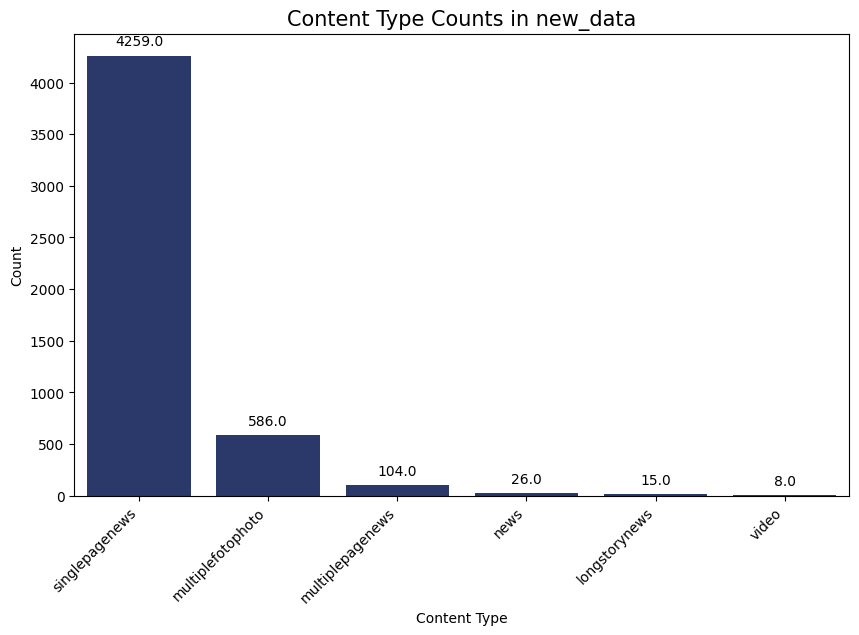

In [202]:
# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(custom_palette)
ax = sns.countplot(x='contenttype', data=new_data)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Annotate counts above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Content Type Counts in new_data', size=15)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

In [147]:
new_data.groupby('contenttype')['Users'].mean()

contenttype
longstorynews        210.933333
multiplefotophoto    570.730375
multiplepagenews     218.432692
news                 314.384615
singlepagenews       430.873679
video                 53.375000
Name: Users, dtype: float64

In [148]:
new_data.groupby('contenttype')['Pageviews'].mean()

contenttype
longstorynews        238.000000
multiplefotophoto    649.899317
multiplepagenews     243.750000
news                 349.230769
singlepagenews       494.730923
video                 63.125000
Name: Pageviews, dtype: float64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\1920279194.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


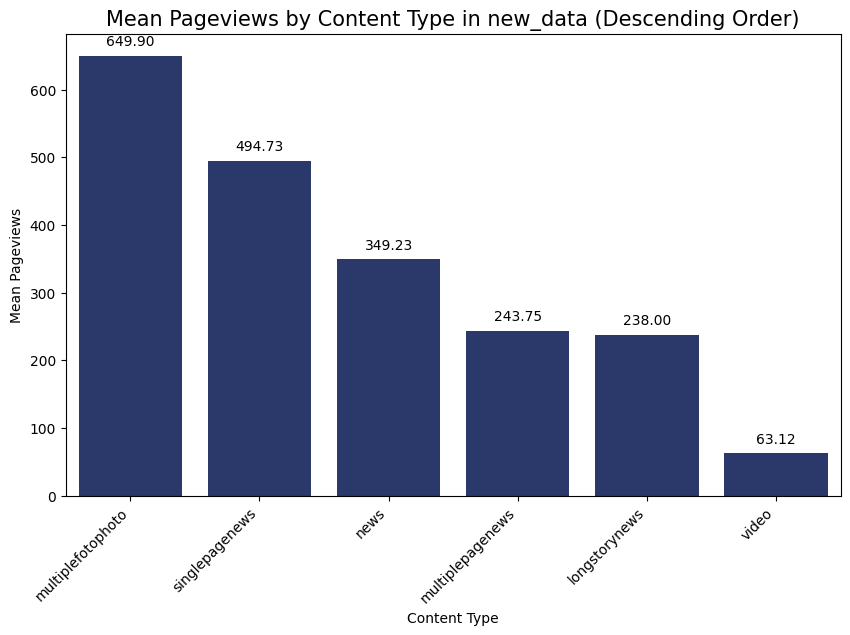

In [204]:
# Get the order of content types by descending mean pageviews
order = new_data.groupby('contenttype')['Pageviews'].mean().sort_values(ascending=False).index

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(custom_palette)
ax = sns.barplot(x='contenttype', y='Pageviews', data=new_data.groupby('contenttype')['Pageviews'].mean().reset_index(), order=order)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Annotate mean pageviews above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Mean Pageviews by Content Type in new_data (Descending Order)', size=15)
plt.xlabel('Content Type')
plt.ylabel('Mean Pageviews')
plt.show()

In [149]:
new_data.groupby('contenttype')['Avg. Time on Page'].mean()

contenttype
longstorynews        162.792794
multiplefotophoto     65.732844
multiplepagenews      65.564935
news                 173.920150
singlepagenews       176.402802
video                 68.476009
Name: Avg. Time on Page, dtype: float64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\3088972205.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


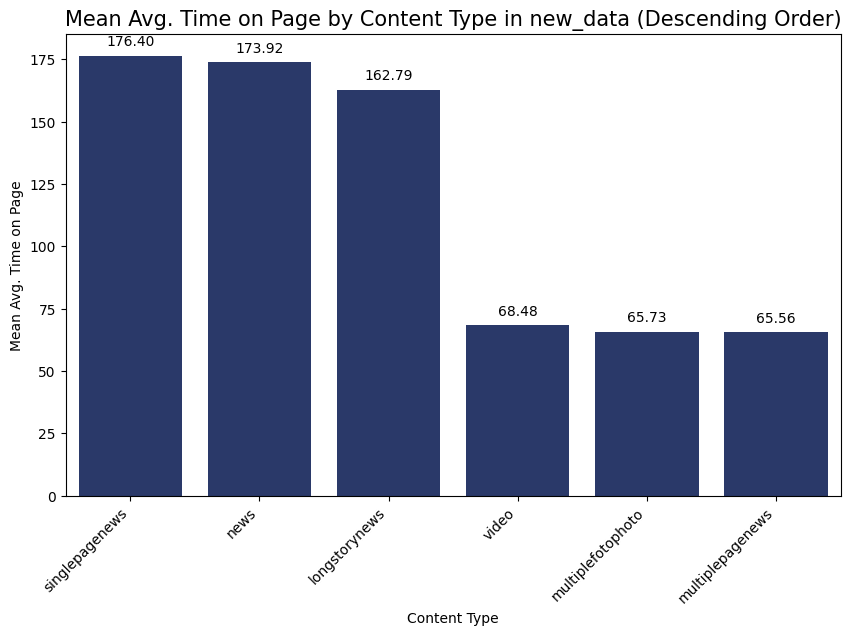

In [205]:
# Get the order of content types by descending mean Avg. Time on Page
order = new_data.groupby('contenttype')['Avg. Time on Page'].mean().sort_values(ascending=False).index

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(custom_palette)
ax = sns.barplot(x='contenttype', y='Avg. Time on Page', data=new_data.groupby('contenttype')['Avg. Time on Page'].mean().reset_index(), order=order)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Annotate mean Avg. Time on Page above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Mean Avg. Time on Page by Content Type in new_data (Descending Order)', size=15)
plt.xlabel('Content Type')
plt.ylabel('Mean Avg. Time on Page')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\2229105272.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


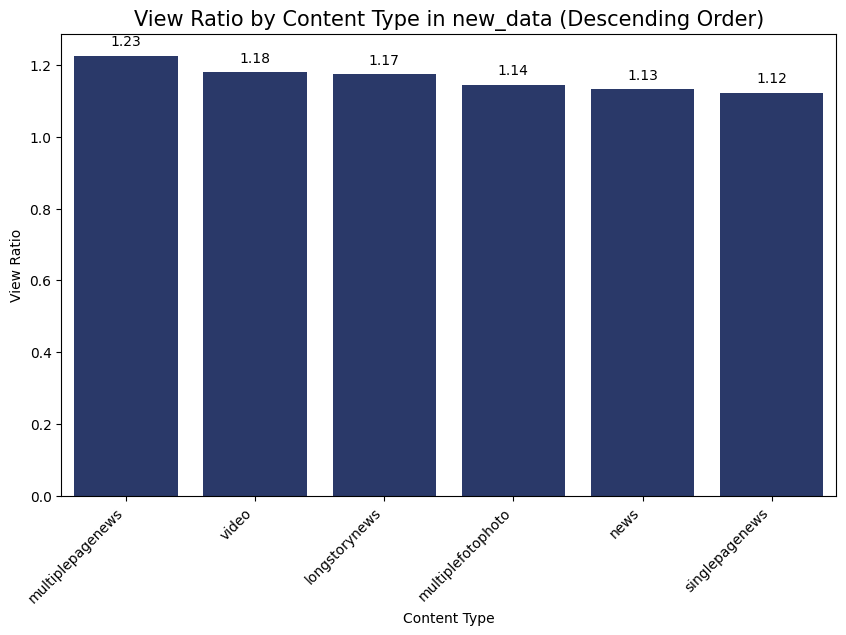

In [210]:
# Get the order of content types by descending mean Avg. Time on Page
order = new_data.groupby('contenttype')['view ratio'].mean().sort_values(ascending=False).index

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(custom_palette)
ax = sns.barplot(x='contenttype', y='view ratio', data=new_data.groupby('contenttype')['view ratio'].mean().reset_index(), order=order)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Annotate mean Avg. Time on Page above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('View Ratio by Content Type in new_data (Descending Order)', size=15)
plt.xlabel('Content Type')
plt.ylabel('View Ratio')
plt.show()

In [178]:
new_data.groupby('Source / Medium')['Users'].mean().sort_values(ascending=False)

Source / Medium
banner / apps                             5524.538462
facebook / cpc                            3104.836735
googleapis.com / referral                  967.336364
detik.com / referral                       808.595262
twitter / oa                               627.888889
facebook / oa                              551.236111
m.facebook.com / referral                  468.594828
m.detik.com / referral                     329.690909
(direct) / (none)                          299.457364
igstories / oa                             280.500000
google / organic                           267.148012
instagram.com / referral                   235.000000
t.co / referral                            211.173913
id.yahoo.com / referral                    207.285714
hot.detik.com / referral                   192.219178
news.detik.com / referral                  110.136929
flipboard.com / referral                    95.052632
sport.detik.com / referral                  94.923077
notifikasi /

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\2005453370.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


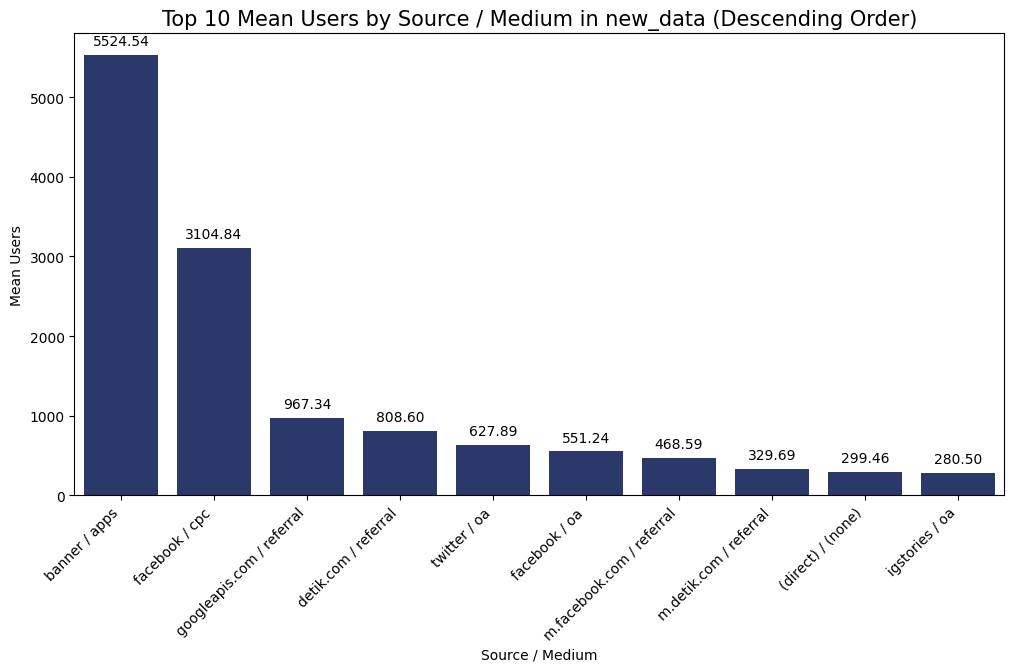

In [206]:
# Get the top 10 source/medium by mean Users
top_sources = new_data.groupby('Source / Medium')['Users'].mean().nlargest(10).index

# Plotting
plt.figure(figsize=(12, 6))
sns.set_palette(custom_palette)
ax = sns.barplot(x='Source / Medium', y='Users', data=new_data.groupby('Source / Medium')['Users'].mean().reset_index(), order=top_sources)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Annotate mean Users above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Top 10 Mean Users by Source / Medium in new_data (Descending Order)', size=15)
plt.xlabel('Source / Medium')
plt.ylabel('Mean Users')
plt.show()

### 7. Analisis Sentimen

In [152]:
sentiment_results = []
confidence_results = []

for text in tqdm(new_data['title_clean'], dynamic_ncols=True):
    result = pipe(text)
    sentiment = result[0]['label']
    confidence = result[0]['score']
    sentiment_results.append(sentiment)
    confidence_results.append(confidence)

new_data['sentiment'] = sentiment_results
new_data['confidence'] = confidence_results

100%|██████████| 4998/4998 [04:12<00:00, 19.82it/s]


In [153]:
new_data

,Page Title,Page,articleid,contenttype,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,view ratio,title_clean,sentiment,confidence
0,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,google / organic,99099,127793,1.546663,113.012962,93.089694,18666,1.289549,gempa keras guncang jakarta,Neutral,0.998549
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",m.detik.com/health/read/2018/01/18/124423/3821...,3821182,singlepagenews,banner / apps,66409,110322,1.651700,14.790801,2.804197,59502,1.661251,video dr michael triangto dokter lapangan bagi...,Neutral,0.999713
2,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",m.detik.com/news/berita/d-3826824/antar-tuyul-...,3826824,singlepagenews,facebook / cpc,34774,37954,1.103282,47.572309,4.260872,12404,1.091448,antar tuyul 7 pengemudi grab dibekuk,Neutral,0.999671
3,"Beredar Kabar Ada Gempa Susulan 7,4 SR Nanti M...",m.detik.com/news/berita/d-3829827/beredar-kaba...,3829827,singlepagenews,google / organic,29656,36411,1.411662,83.666460,22.214847,6533,1.227779,beredar kabar ada gempa susulan 7 4 sr nanti m...,Neutral,0.999699
4,"Guncangan Terasa Kencang di Jakarta, Pusat Gem...",m.detik.com/news/berita/d-3829131/guncangan-te...,3829131,singlepagenews,google / organic,27159,32868,1.798621,106.218836,60.017182,5363,1.210207,guncangan terasa kencang di jakarta pusat gemp...,Neutral,0.999688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,"Terjepret Kamera Saat Razia, Wajah Pemandu Lag...",m.detik.com/news/berita-jawa-timur/d-3792087/t...,3792087,singlepagenews,(direct) / (none),20,25,1.086957,34.130435,17.666667,3,1.250000,terjepret kamera saat razia wajah pemandu lagu...,Neutral,0.999738
4994,"Tetap Cantik di Usia 50 Tahun, Ini Perawatan W...",m.detik.com/wolipop/read/2017/10/06/144722/367...,3673266,singlepagenews,google / organic,20,26,1.300000,58.400000,155.142857,4,1.300000,tetap cantik di usia 50 tahun ini perawatan wa...,Neutral,0.928852
4995,Tidak Tahan karena Suami Suka Berkata Kasar? I...,m.detik.com/wolipop/read/2014/09/02/184730/267...,2679433,singlepagenews,google / organic,20,22,1.100000,166.650000,494.400000,3,1.100000,tidak tahan karena suami suka berkata kasar? i...,Negative,0.999838
4996,Tips Menggunakan ATM dan Menukar Uang di Sekit...,m.detik.com/news/berita/3274835/tips-menggunak...,3274835,singlepagenews,google / organic,20,20,1.000000,88.250000,5.578947,6,1.000000,tips menggunakan atm dan menukar uang di sekit...,Neutral,0.999661


In [154]:
new_data.groupby('sentiment')['Pageviews'].mean()

sentiment
Negative    316.139286
Neutral     554.841805
Positive    275.777778
Name: Pageviews, dtype: float64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31540\2984804902.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=sentiment_pageviews.index, y=sentiment_pageviews, ci=None)


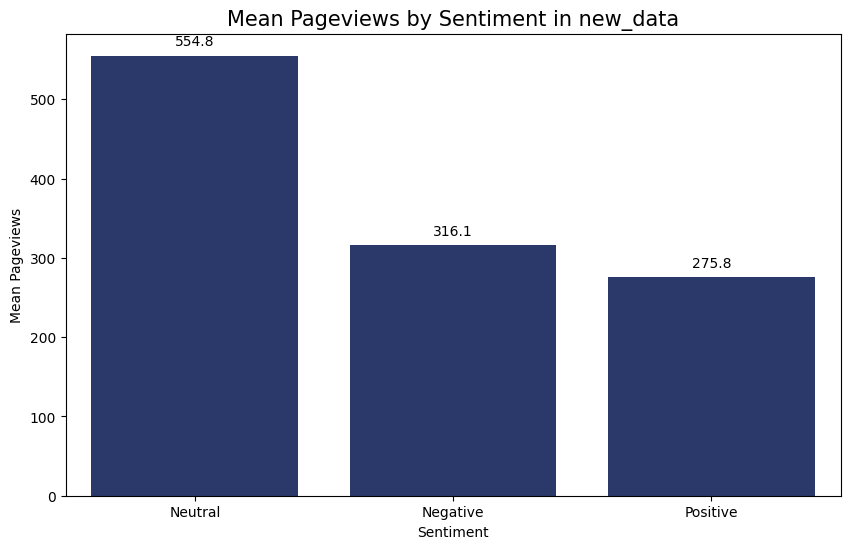

In [209]:
# Calculate mean Pageviews by sentiment
sentiment_pageviews = new_data.groupby('sentiment')['Pageviews'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(custom_palette)
ax = sns.barplot(x=sentiment_pageviews.index, y=sentiment_pageviews, ci=None)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Mean Pageviews by Sentiment in new_data', size=15)
plt.xlabel('Sentiment')
plt.ylabel('Mean Pageviews')
plt.show()

In [155]:
new_data['sentiment'].value_counts()

sentiment
Neutral     4033
Negative     560
Positive     405
Name: count, dtype: int64

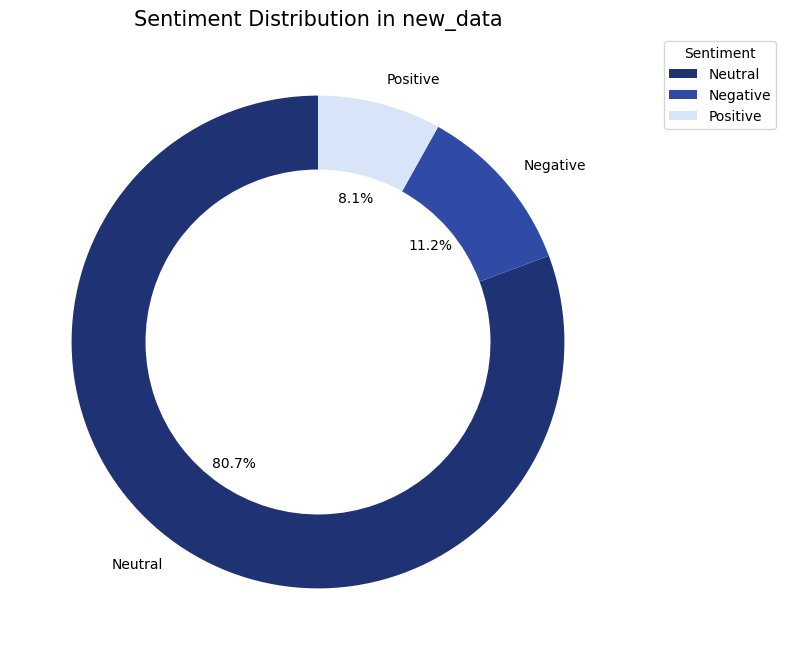

In [207]:
# Plotting
plt.figure(figsize=(8, 8))
sns.set_palette(custom_palette)
sentiment_counts = new_data['sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Sentiment Distribution in new_data', size=15)

# Add legend
plt.legend(sentiment_counts.index, title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [162]:
new_data

,Page Title,Page,articleid,contenttype,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,view ratio,title_clean,sentiment,confidence,title_stemmed
0,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,google / organic,99099,127793,1.546663,113.012962,93.089694,18666,1.289549,gempa keras guncang jakarta,Neutral,0.998549,gempa keras guncang jakarta
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",m.detik.com/health/read/2018/01/18/124423/3821...,3821182,singlepagenews,banner / apps,66409,110322,1.651700,14.790801,2.804197,59502,1.661251,video dr michael triangto dokter lapangan bagi...,Neutral,0.999713,video dr michael triangto dokter lapang bagi y...
2,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",m.detik.com/news/berita/d-3826824/antar-tuyul-...,3826824,singlepagenews,facebook / cpc,34774,37954,1.103282,47.572309,4.260872,12404,1.091448,antar tuyul 7 pengemudi grab dibekuk,Neutral,0.999671,antar tuyul 7 kemudi grab bekuk
3,"Beredar Kabar Ada Gempa Susulan 7,4 SR Nanti M...",m.detik.com/news/berita/d-3829827/beredar-kaba...,3829827,singlepagenews,google / organic,29656,36411,1.411662,83.666460,22.214847,6533,1.227779,beredar kabar ada gempa susulan 7 4 sr nanti m...,Neutral,0.999699,edar kabar ada gempa susul 7 4 sr nanti malam ...
4,"Guncangan Terasa Kencang di Jakarta, Pusat Gem...",m.detik.com/news/berita/d-3829131/guncangan-te...,3829131,singlepagenews,google / organic,27159,32868,1.798621,106.218836,60.017182,5363,1.210207,guncangan terasa kencang di jakarta pusat gemp...,Neutral,0.999688,guncang asa kencang di jakarta pusat gempa di ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,"Terjepret Kamera Saat Razia, Wajah Pemandu Lag...",m.detik.com/news/berita-jawa-timur/d-3792087/t...,3792087,singlepagenews,(direct) / (none),20,25,1.086957,34.130435,17.666667,3,1.250000,terjepret kamera saat razia wajah pemandu lagu...,Neutral,0.999738,jepret kamera saat razia wajah pandu lagu ini ...
4994,"Tetap Cantik di Usia 50 Tahun, Ini Perawatan W...",m.detik.com/wolipop/read/2017/10/06/144722/367...,3673266,singlepagenews,google / organic,20,26,1.300000,58.400000,155.142857,4,1.300000,tetap cantik di usia 50 tahun ini perawatan wa...,Neutral,0.928852,tetap cantik di usia 50 tahun ini awat wajah y...
4995,Tidak Tahan karena Suami Suka Berkata Kasar? I...,m.detik.com/wolipop/read/2014/09/02/184730/267...,2679433,singlepagenews,google / organic,20,22,1.100000,166.650000,494.400000,3,1.100000,tidak tahan karena suami suka berkata kasar? i...,Negative,0.999838,tidak tahan karena suami suka kata kasar ini y...
4996,Tips Menggunakan ATM dan Menukar Uang di Sekit...,m.detik.com/news/berita/3274835/tips-menggunak...,3274835,singlepagenews,google / organic,20,20,1.000000,88.250000,5.578947,6,1.000000,tips menggunakan atm dan menukar uang di sekit...,Neutral,0.999661,tips guna atm dan tukar uang di sekitar masjid...


### 8. Analisis Frekuensi Kata

In [169]:
word_count = new_data.title_without_stopwords.str.split(expand=True).stack().value_counts().reset_index()
word_count.columns = ['Word', 'Frequency'] 
word_count

,Word,Frequency
0,foto,253
1,gempa,214
2,rp,198
3,5,169
4,2018,144
...,...,...
6646,spontanitas,1
6647,labia,1
6648,minora,1
6649,diler,1


In [172]:
word_count['Pageviews'] = 0

# Iterate over each row in word_count
for index, row in tqdm(word_count.iterrows(), dynamic_ncols=True):
    word = row['Word']
    
    # Calculate the mean pageviews for titles containing the current word
    word_count.loc[index, 'Pageviews'] = new_data[new_data['title_without_stopwords'].str.contains(word)]['Pageviews'].mean()


6651it [00:16, 413.10it/s]


In [213]:
word_count['Viewratio'] = 0

# Iterate over each row in word_count
for index, row in tqdm(word_count.iterrows(), dynamic_ncols=True):
    word = row['Word']
    
    # Calculate the mean pageviews for titles containing the current word
    word_count.loc[index, 'Viewratio'] = new_data[new_data['title_without_stopwords'].str.contains(word)]['view ratio'].mean()


6651it [00:16, 401.49it/s]


In [214]:
word_count = word_count[['Word', 'Frequency', 'Pageviews', 'Viewratio']]

In [215]:
word_count

,Word,Frequency,Pageviews,Viewratio
0,foto,253,629.492063,1.159229
1,gempa,214,2644.507042,1.119395
2,rp,198,433.536364,1.127805
3,5,169,288.953405,1.131509
4,2018,144,159.701389,1.134273
...,...,...,...,...
6646,spontanitas,1,571.000000,1.113060
6647,labia,1,56.000000,1.098039
6648,minora,1,56.000000,1.098039
6649,diler,1,53.000000,1.039216


In [216]:
selected_word = word_count[word_count['Frequency']>50]
selected_word

,Word,Frequency,Pageviews,Viewratio
0,foto,253,629.492063,1.159229
1,gempa,214,2644.507042,1.119395
2,rp,198,433.536364,1.127805
3,5,169,288.953405,1.131509
4,2018,144,159.701389,1.134273
...,...,...,...,...
59,bayi,53,92.057692,1.113728
60,alas,53,245.032787,1.118224
61,motor,53,518.571429,1.131551
62,tangkap,52,277.769231,1.157764


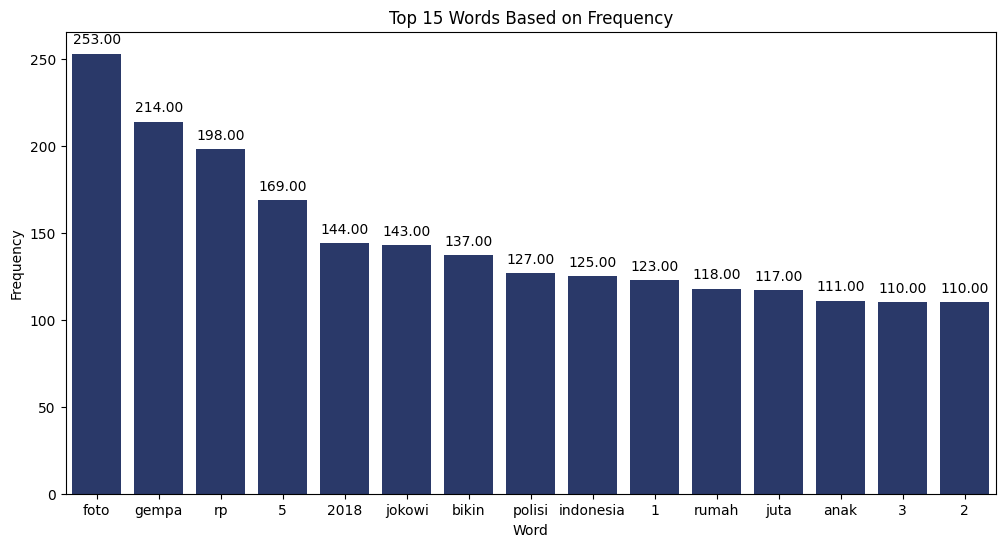

In [220]:
# Function to add values on top of the bars
def add_values_on_top(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Top 15 words based on frequency
top_words_frequency = selected_word.nlargest(15, 'Frequency')
plt.figure(figsize=(12, 6))
sns.set_palette(custom_palette)
ax1 = sns.barplot(x='Word', y='Frequency', data=top_words_frequency)
ax1.set_title('Top 15 Words Based on Frequency')
ax1.set_xlabel('Word')
ax1.set_ylabel('Frequency')
add_values_on_top(ax1)
plt.show()

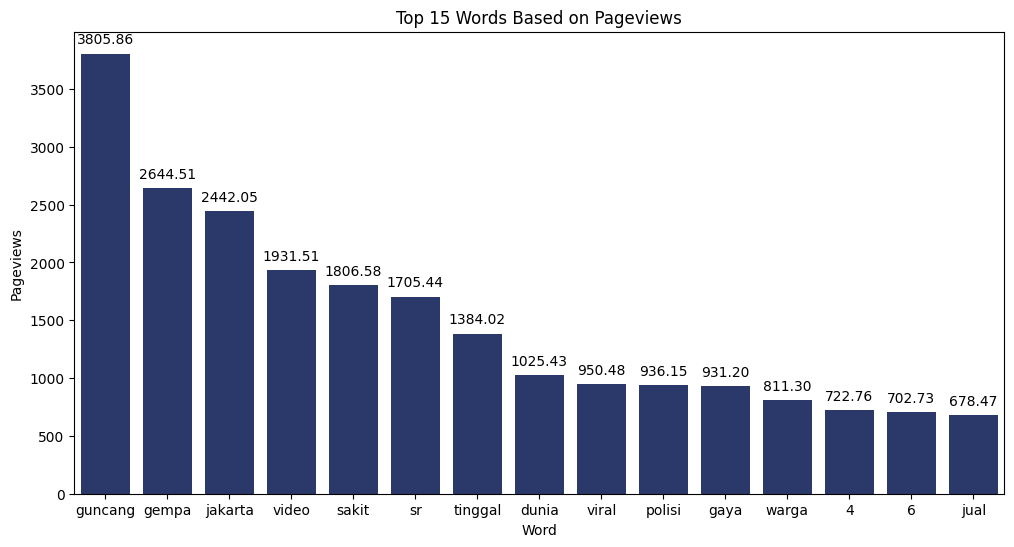

In [221]:
# Top 15 words based on pageviews
top_words_pageviews = selected_word.nlargest(15, 'Pageviews')
plt.figure(figsize=(12, 6))
sns.set_palette(custom_palette)
ax2 = sns.barplot(x='Word', y='Pageviews', data=top_words_pageviews)
ax2.set_title('Top 15 Words Based on Pageviews')
ax2.set_xlabel('Word')
ax2.set_ylabel('Pageviews')
add_values_on_top(ax2)
plt.show()

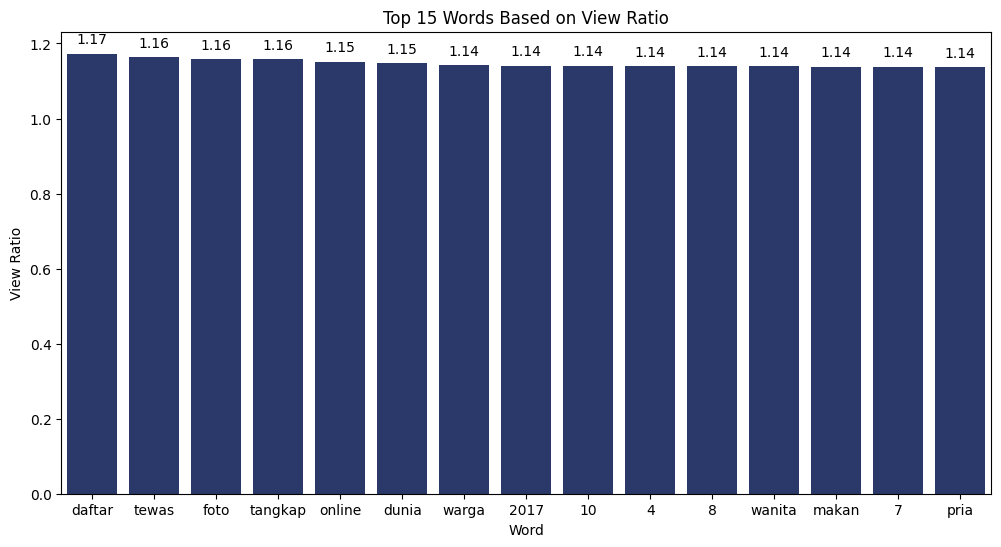

In [222]:
# Top 15 words based on view ratio
top_words_viewratio = selected_word.nlargest(15, 'Viewratio')
plt.figure(figsize=(12, 6))
sns.set_palette(custom_palette)
ax3 = sns.barplot(x='Word', y='Viewratio', data=top_words_viewratio)
ax3.set_title('Top 15 Words Based on View Ratio')
ax3.set_xlabel('Word')
ax3.set_ylabel('View Ratio')
add_values_on_top(ax3)
plt.show()